In [51]:
#### IMPORTING ALL THE NECESSARY AND REQUIRED LIBRARIES

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [54]:
data = pd.read_excel('Stroke-Death-Probability.xlsx')
data.head(3)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,27,Probability of death,195,Namibia,1,Male,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000118,NaN,NaN
1,27,Probability of death,195,Namibia,2,Female,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000054,NaN,NaN
2,27,Probability of death,195,Namibia,1,Male,9,20-24 years,494,Stroke,8,Probability of death,2014,0.000128,NaN,NaN


In [55]:
# Describe the DataFrame and display it neatly
display(data.describe())

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,360.0,360.0,360.000000,360.000000,360.0,360.0,360.000000,360.000000,0.0,0.0
mean,27.0,195.0,1.500000,30.500000,494.0,8.0,2016.500000,0.059491,NaN,NaN
std,0.0,0.0,0.500696,50.411399,0.0,0.0,2.876279,0.139575,NaN,NaN
min,27.0,195.0,1.000000,8.000000,494.0,8.0,2012.000000,0.000045,NaN,NaN
25%,27.0,195.0,1.000000,12.000000,494.0,8.0,2014.000000,0.000231,NaN,NaN
50%,27.0,195.0,1.500000,16.500000,494.0,8.0,2016.500000,0.005938,NaN,NaN
75%,27.0,195.0,2.000000,30.000000,494.0,8.0,2019.000000,0.056492,NaN,NaN
max,27.0,195.0,2.000000,235.000000,494.0,8.0,2021.000000,1.328734,NaN,NaN


In [56]:
# Drop the 'upper' and 'lower' columns
data = data.drop(columns=['upper', 'lower'])

# Display the first few rows of the modified DataFrame to verify
data.head(3)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val
0,27,Probability of death,195,Namibia,1,Male,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000118
1,27,Probability of death,195,Namibia,2,Female,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000054
2,27,Probability of death,195,Namibia,1,Male,9,20-24 years,494,Stroke,8,Probability of death,2014,0.000128


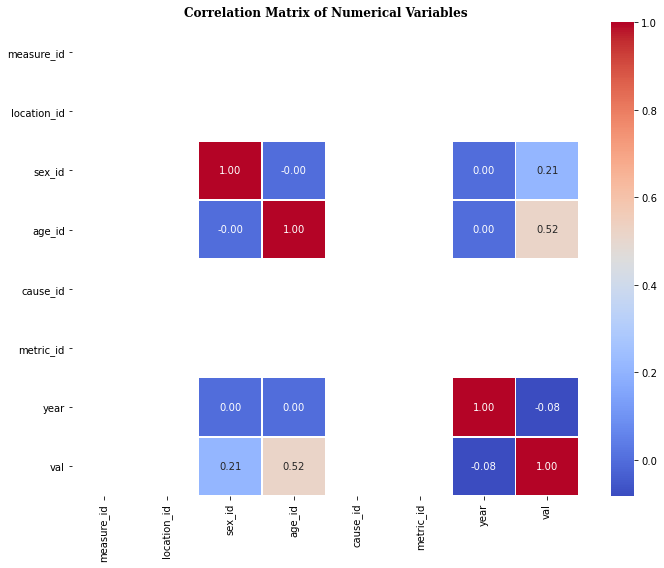

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the correct numerical columns from your dataset
numerical_columns = ['measure_id', 'location_id', 'sex_id', 'age_id', 'cause_id', 'metric_id', 'year', 'val']

# Extract only the numerical columns for correlation analysis
data_numerical = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = data_numerical.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix of Numerical Variables', fontsize=12, fontfamily='serif', fontweight='bold')
plt.tight_layout()

plt.show()


In [57]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the missing values count for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
dtype: int64


In [45]:
# Get unique values in 'age_name' column
unique_values = data['age_name'].unique()

# Print the unique values
print("Unique values in 'age_name' column:")
print(unique_values)

Unique values in 'age_name' column:
['15-19 years' '20-24 years' '25-29 years' '30-34 years' '35-39 years'
 '40-44 years' '45-49 years' '50-54 years' '55-59 years' '60-64 years'
 '65-69 years' '70-74 years' '75-79 years' '80-84 years' '85-89 years'
 '90-94 years' '0-14 years' '95+ years']


In [46]:
# Define a function to standardize the age groups
def standardize_age_group(age):
    if age in ['0-14 years']:
        return 'Children'
    elif age in ['15-19 years']:
        return 'Teenagers'
    elif age in ['20-24 years','25-29 years','30-34 years']:
        return 'Young Adult'
    elif age in ['35-39 years','40-44 years','45-49 years']:
        return 'Middle Adult'
    elif age in ['50-54 years','55-59 years','60-64 years']:
        return 'Old Adults'
    elif age in ['65-69 years','70-74 years','75-79 years']:
        return 'Senior Adult'
    elif age in ['80-84 years','85-89 years','90-94 years','95+ years']:
        return 'Elderly'
    else:
        return 'Unknown'

# Apply the function to create a new column
data['Standardized Age Group'] = data['age_name'].apply(standardize_age_group)

# Display the modified DataFrame
data.head(3)


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,Standardized Age Group
0,27,Probability of death,195,Namibia,1,Male,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000118,Teenagers
1,27,Probability of death,195,Namibia,2,Female,8,15-19 years,494,Stroke,8,Probability of death,2014,0.000054,Teenagers
2,27,Probability of death,195,Namibia,1,Male,9,20-24 years,494,Stroke,8,Probability of death,2014,0.000128,Young Adult


In [11]:
# Group by age_name and calculate mean probability
age_group_data = data.groupby('age_name')['val'].mean().reset_index()

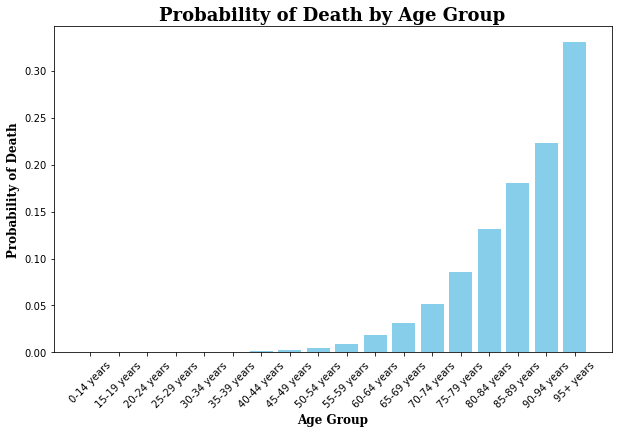

In [12]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(age_group_data['age_name'], age_group_data['val'], color='skyblue')
plt.xlabel('Age Group', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Probability of Death', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Probability of Death by Age Group',  fontsize=18, fontfamily='serif', fontweight='bold')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

In [50]:
############### Correlation Plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only (adjust based on your dataset)
numerical_columns = ['val', 'age_id', 'year', 'sex_id', 'measure_id', 'rei_id', 'metric_id']  # Replace/add columns as needed
data_numerical = data[numerical_columns]

# Compute the correlation matrix
correlation_matrix = data_numerical.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('Correlation Matrix of Numerical Variables', fontsize=18, fontfamily='serif', fontweight='bold')
plt.tight_layout()

plt.show()


KeyError: "['rei_id'] not in index"

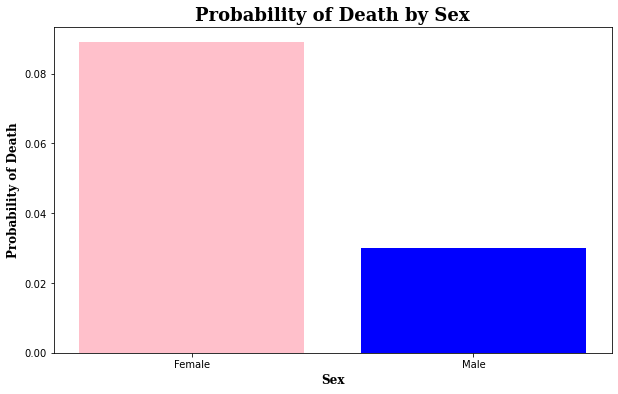

In [47]:
sex_group_data = data.groupby('sex_name')['val'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(sex_group_data['sex_name'], sex_group_data['val'], color=['pink', 'blue'])
plt.xlabel('Sex', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Probability of Death', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Probability of Death by Sex', fontsize=18, fontfamily='serif', fontweight='bold')
plt.show()

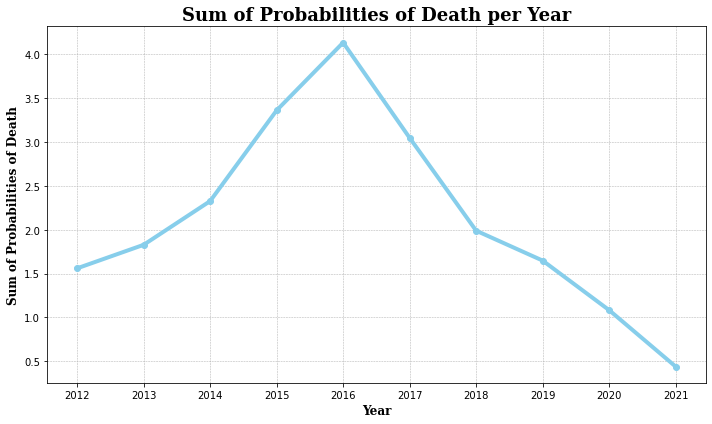

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate probabilities by year
yearly_sum = data.groupby('year')['val'].sum().reset_index()

# Plotting sum of probabilities of death per year as a line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum['year'], yearly_sum['val'], marker='o', linestyle='-', color='skyblue', linewidth=4)

plt.xlabel('Year', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Sum of Probabilities of Death', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Sum of Probabilities of Death per Year', fontsize=18, fontfamily='serif', fontweight='bold')

plt.grid(True, linestyle='--', linewidth=0.5)

plt.xticks(yearly_sum['year'])  # Ensure all years are shown on x-axis
plt.tight_layout()  # Adjust layout for better presentation

plt.show()

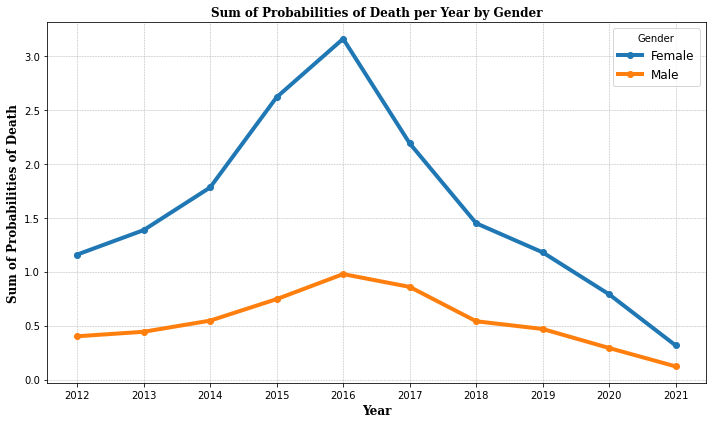

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate probabilities by year and gender
yearly_gender_sum = data.groupby(['year', 'sex_name'])['val'].sum().reset_index()

# Plotting sum of probabilities of death per year for each gender
plt.figure(figsize=(10, 6))

# Plot each gender's line separately
for gender in yearly_gender_sum['sex_name'].unique():
    gender_data = yearly_gender_sum[yearly_gender_sum['sex_name'] == gender]
    plt.plot(gender_data['year'], gender_data['val'], marker='o', linestyle='-', linewidth=4, label=gender)

# Customize labels, title, and grid
plt.xlabel('Year', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Sum of Probabilities of Death', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Sum of Probabilities of Death per Year by Gender', fontsize=12, fontfamily='serif', fontweight='bold')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(yearly_gender_sum['year'].unique())  # Ensure all years are shown on x-axis
plt.legend(title="Gender", fontsize=12)  # Add legend for gender

plt.tight_layout()  # Adjust layout for better presentation

plt.show()

In [18]:
# Group by age_name and sex_name and calculate mean probability
age_sex_group_data = data.groupby(['age_name', 'sex_name'])['val'].mean().reset_index()

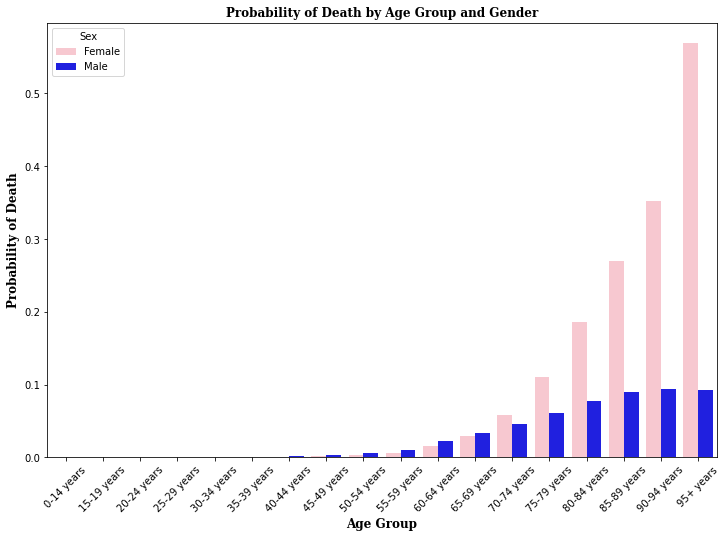

In [19]:
# Plot Probability of Death by Age Group and Gender
plt.figure(figsize=(12, 8))
sns.barplot(x='age_name', y='val', hue='sex_name', data=age_sex_group_data, palette=['pink', 'blue'])
plt.xlabel('Age Group', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Probability of Death', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Probability of Death by Age Group and Gender', fontsize=12, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.show()

In [20]:
###############TRYING TO PLOT THE DISTRIBUTION

In [21]:
pip install seaborn matplotlib

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

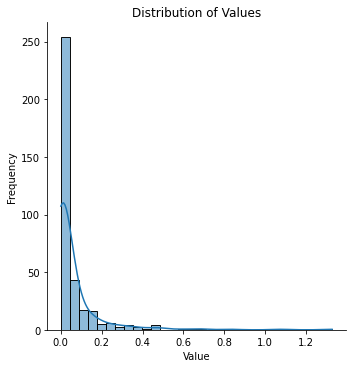

In [34]:
# Using displot for a histogram with a kernel density estimate
sns.displot(data['val'], kde=True, bins=30)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

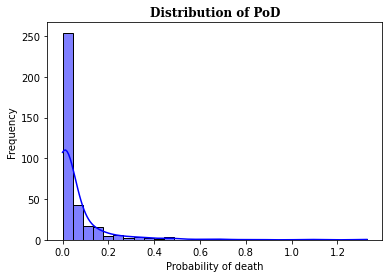

In [37]:
sns.histplot(data['val'], bins=30, color='blue', kde=True)
plt.title('Distribution of PoD', fontsize=12, fontfamily='serif', fontweight='bold')
plt.xlabel('Probability of death')
plt.ylabel('Frequency')
plt.show()

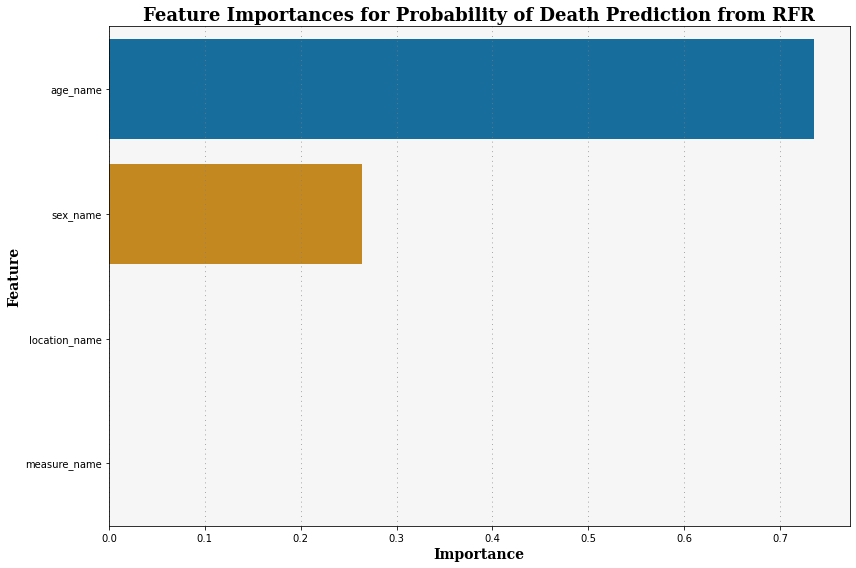

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_excel('Stroke-Death-Probability.xlsx')

# Drop the 'upper' and 'lower' columns
data = data.drop(columns=['upper', 'lower'])

# Handle missing values if necessary (e.g., fill or drop)
data = data.dropna()

# Encode categorical features
label_encoders = {}
for column in ['sex_name', 'age_name', 'location_name', 'measure_name']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target variable
X = data[['sex_name', 'age_name', 'location_name', 'measure_name']]  # Adjust based on actual features
y = data['val']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
importances = model.feature_importances_
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='colorblind')
plt.title('Feature Importances for Probability of Death Prediction from RFR', fontsize=18, fontweight='bold', fontfamily='serif')
plt.xlabel('Importance', fontsize=14, fontweight='bold', fontfamily='serif')
plt.ylabel('Feature', fontsize=14, fontweight='bold', fontfamily='serif')
plt.gca().set_facecolor('#f6f6f6')
plt.grid(color='gray', linestyle=':', axis='x', zorder=0, dashes=(1, 5))
plt.tight_layout()
plt.show()


In [61]:
print(importances_df)

         Feature  Importance
1       age_name     0.73579
0       sex_name     0.26421
2  location_name     0.00000
3   measure_name     0.00000


In [62]:
####################################ADVANCED ANALYSIS#######################################################################

In [63]:
################################FEATURES IMPORTANCES######################################################################

In [64]:
############################# RANDOM FOREST REGRESSOR ###############################################################################

In [65]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Prepare data with additional features
X = data[['age_id', 'sex_id', 'year']]  # Including the year as an additional feature
y = data['val']  # Assuming 'val' is your target variable (continuous)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - Random Forest Regressor
model = RandomForestRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RFR Mean Squared Error (MSE):', mse)
print('RFR Root Mean Squared Error (RMSE):', rmse)
print('RFR Mean Absolute Error (MAE):', mae)
print('RFR R-squared (R²):', r2)

# Restore default warnings behavior
warnings.filterwarnings('default')


RFR Mean Squared Error (MSE): 0.0006645046448618392
RFR Root Mean Squared Error (RMSE): 0.025777987603027495
RFR Mean Absolute Error (MAE): 0.00802863344589853
RFR R-squared (R²): 0.945326571216259


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


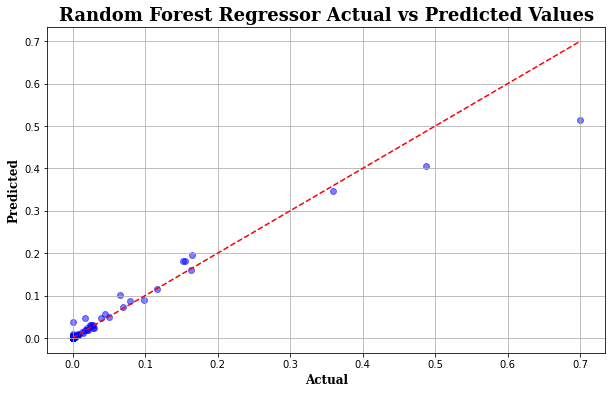

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined from your previous code

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted',fontsize=12, fontfamily='serif', fontweight='bold' )
plt.title('Random Forest Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


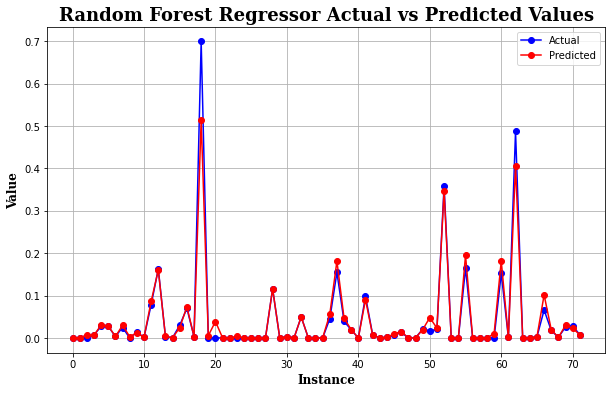

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined from your previous code

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Random Forest Regressor Actual vs Predicted Values',fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

In [27]:
############################# GRADIENT BOOSTING REGRESSOR ##################################################################

In [68]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Prepare data with additional features
X = data[['age_id', 'sex_id', 'year']]  # Including the year as an additional feature
y = data['val']  # Assuming 'val' is your target variable (continuous)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('GBR Mean Squared Error (MSE):', mse)
print('GBR Root Mean Squared Error (RMSE):', rmse)
print('GBR Mean Absolute Error (MAE):', mae)
print('GBR R-squared (R²):', r2)

# Restore default warnings behavior
warnings.filterwarnings('default')

GBR Mean Squared Error (MSE): 0.0018157289811448836
GBR Root Mean Squared Error (RMSE): 0.04261137150039745
GBR Mean Absolute Error (MAE): 0.01558309860728989
GBR R-squared (R²): 0.8506073209437991


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


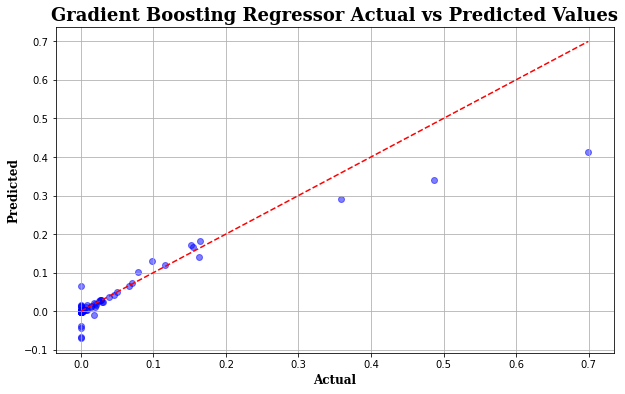

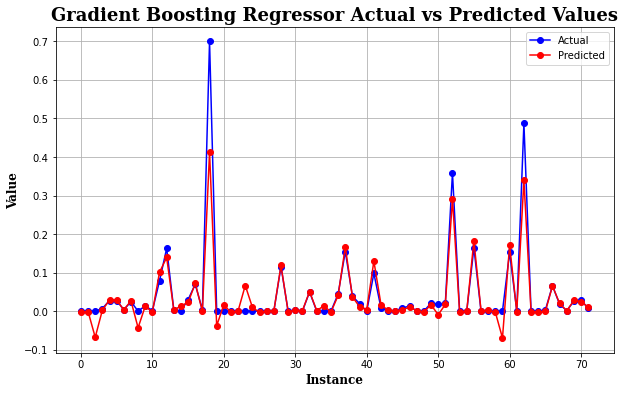

In [69]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

In [71]:
############################# XGboost REGRESSOR ################################################################

XGBR Mean Squared Error (MSE): 0.0007587071087494786
XGBR Root Mean Squared Error (RMSE): 0.027544638475563234
XGBR Mean Absolute Error (MAE): 0.007652289918902266
XGBR R-squared (R²): 0.9375758779134534


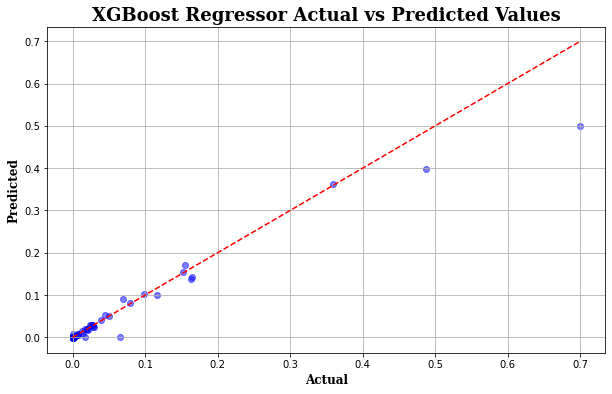

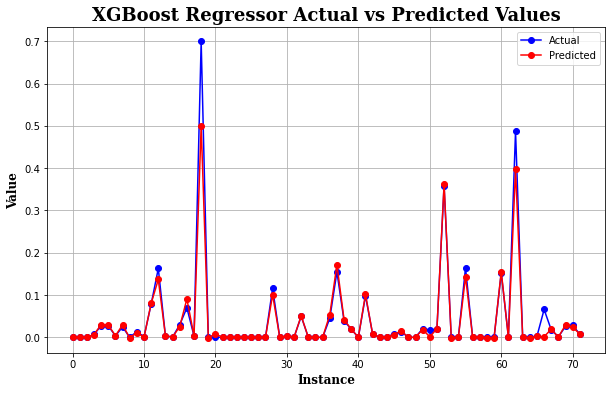

In [72]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Prepare data with additional features
X = data[['age_id', 'sex_id', 'year']]  # Including the year as an additional feature
y = data['val']  # Assuming 'val' is your target variable (continuous)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - XGBoost Regressor
model = xgb.XGBRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XGBR Mean Squared Error (MSE):', mse)
print('XGBR Root Mean Squared Error (RMSE):', rmse)
print('XGBR Mean Absolute Error (MAE):', mae)
print('XGBR R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

In [74]:
############################# DECISION TREES ################################################################

DTR Mean Squared Error (MSE): 0.0005796037901114599
DTR Root Mean Squared Error (RMSE): 0.024074961892211998
DTR Mean Absolute Error (MAE): 0.007519625288448186
DTR R-squared (R²): 0.9523119563023763


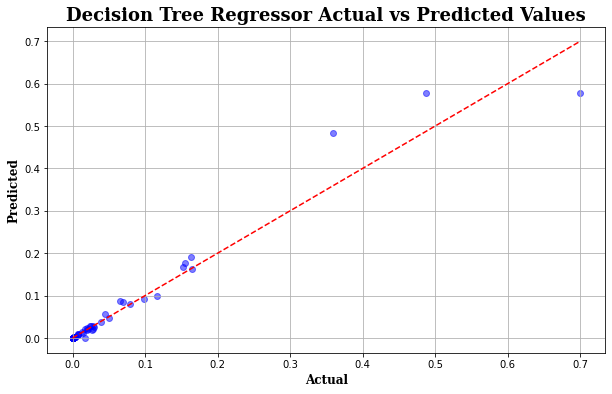

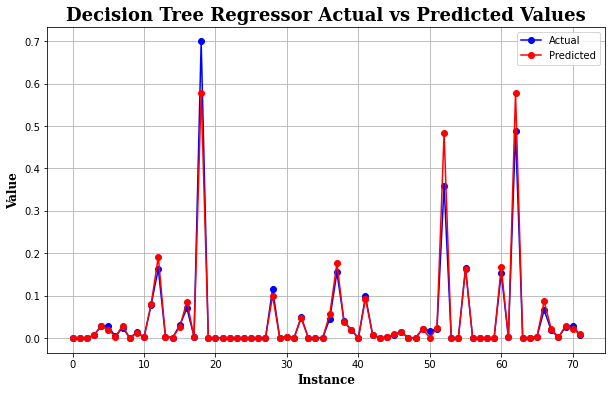

In [75]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Prepare data with additional features
X = data[['age_id', 'sex_id', 'year']]  # Including the year as an additional feature
y = data['val']  # Assuming 'val' is your target variable (continuous)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('DTR Mean Squared Error (MSE):', mse)
print('DTR Root Mean Squared Error (RMSE):', rmse)
print('DTR Mean Absolute Error (MAE):', mae)
print('DTR R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


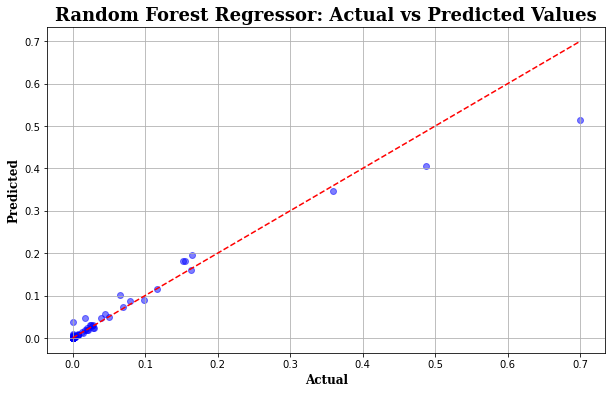

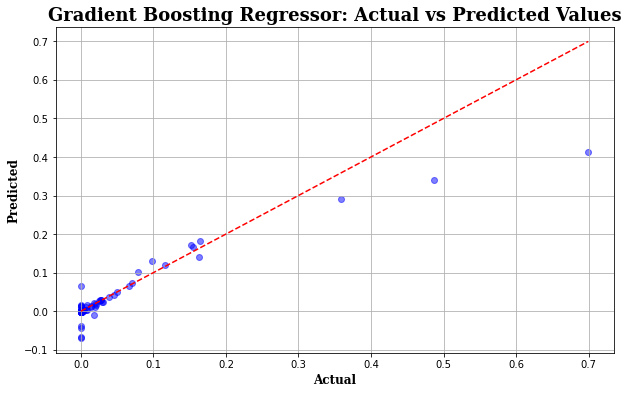

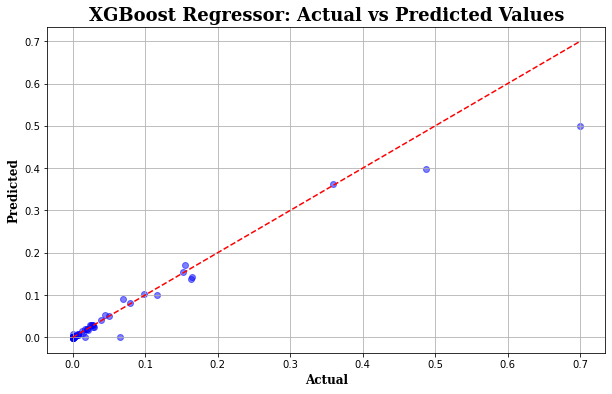

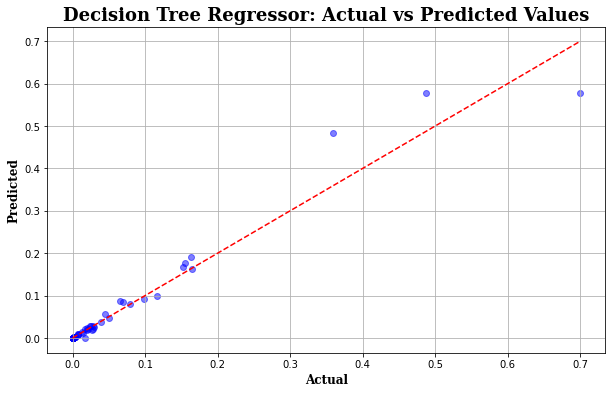

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming data is already loaded and prepared in variables `X` and `y`
# Example:
# X = data[['age_id', 'sex_id', 'year']]
# y = data['val']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

# Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

# XGBoost Regressor
model_xgbr = xgb.XGBRegressor(random_state=42)
model_xgbr.fit(X_train, y_train)
y_pred_xgbr = model_xgbr.predict(X_test)

# Decision Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

# Scatter Plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Random Forest Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


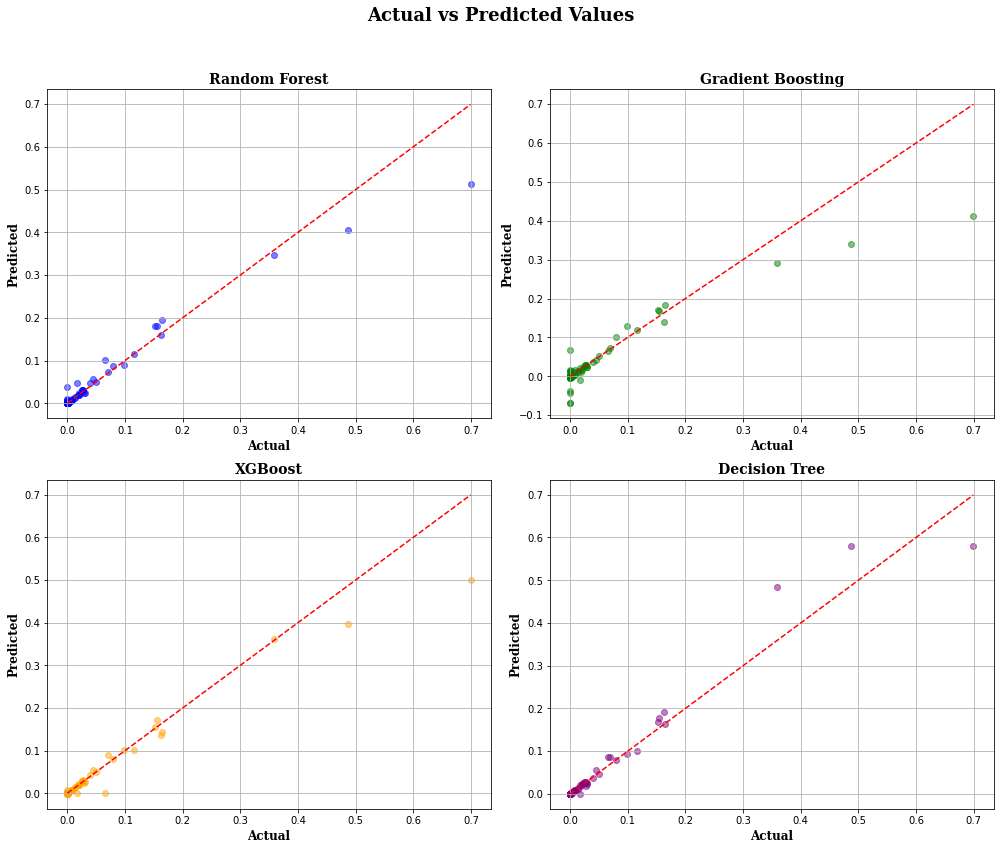

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Assuming data is already loaded and prepared in variables `X` and `y`
# Example:
# X = data[['age_id', 'sex_id', 'year']]
# y = data['val']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

# Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

# XGBoost Regressor
model_xgbr = xgb.XGBRegressor(random_state=42)
model_xgbr.fit(X_train, y_train)
y_pred_xgbr = model_xgbr.predict(X_test)

# Decision Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

# Create subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# List of models, predictions, and colors
models = [
    ('Random Forest', y_pred_rfr, 'blue'),
    ('Gradient Boosting', y_pred_gbr, 'green'),
    ('XGBoost', y_pred_xgbr, 'orange'),
    ('Decision Tree', y_pred_dtr, 'purple')
]

# Plot scatter plots for each model
for ax, (model_name, y_pred, color) in zip(axs.ravel(), models):
    ax.scatter(y_test, y_pred, color=color, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_title(model_name, fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(True)

# Overall title
fig.suptitle('Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


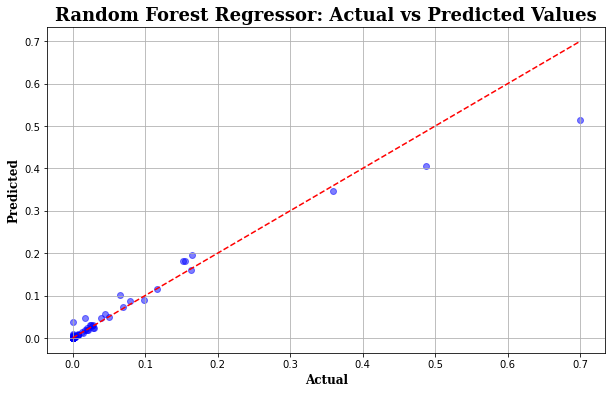

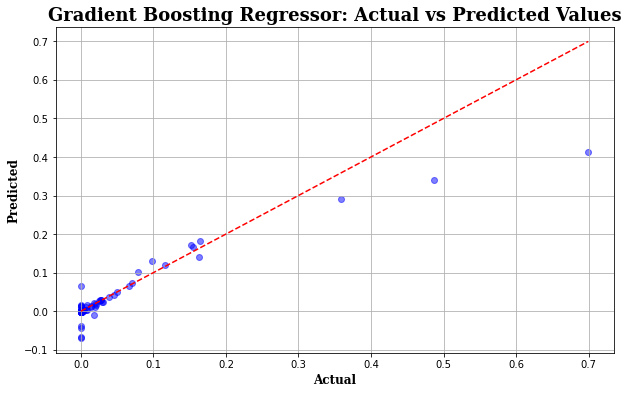

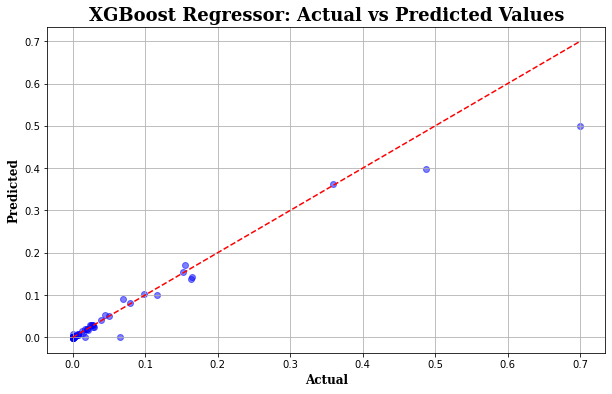

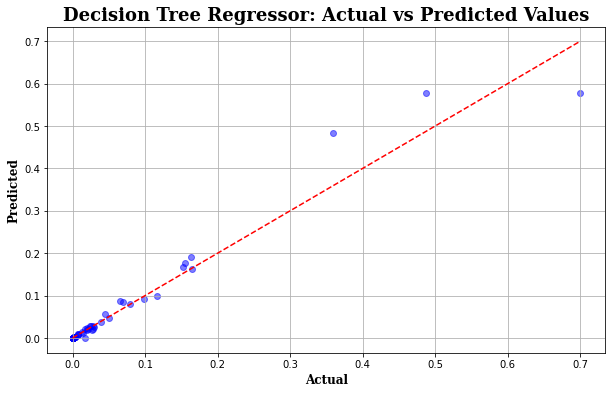

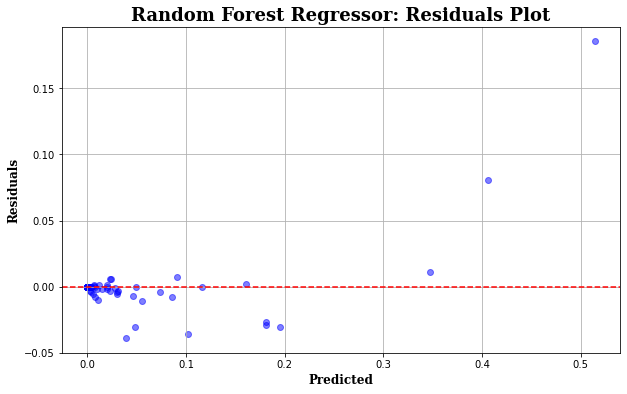

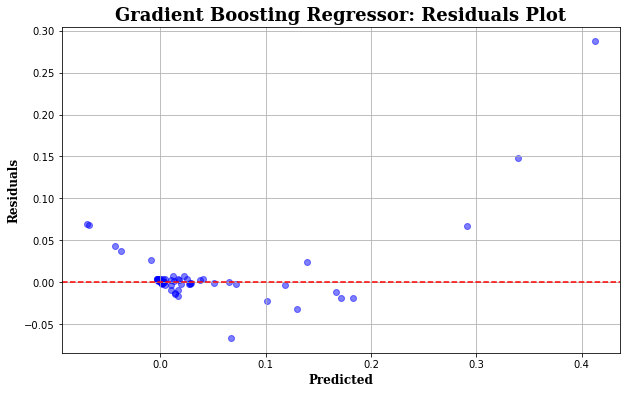

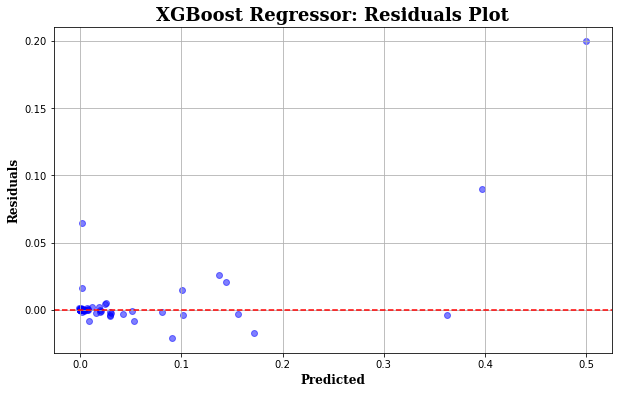

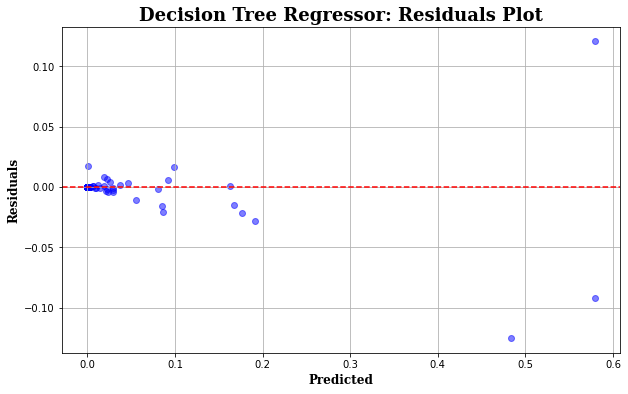

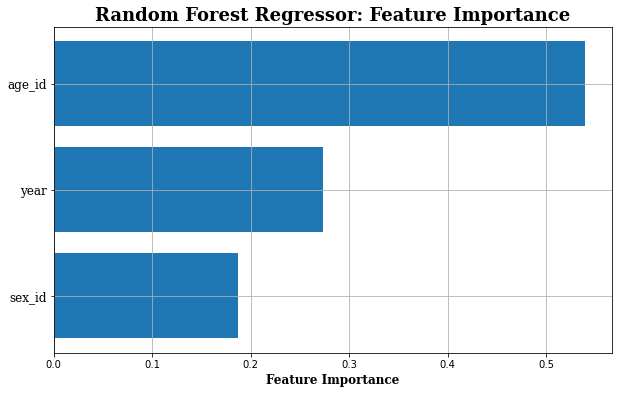

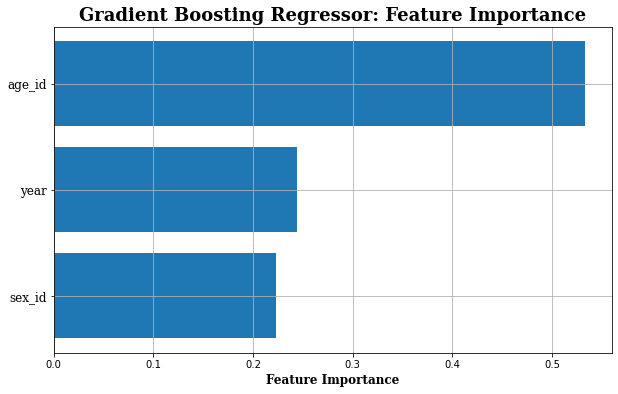

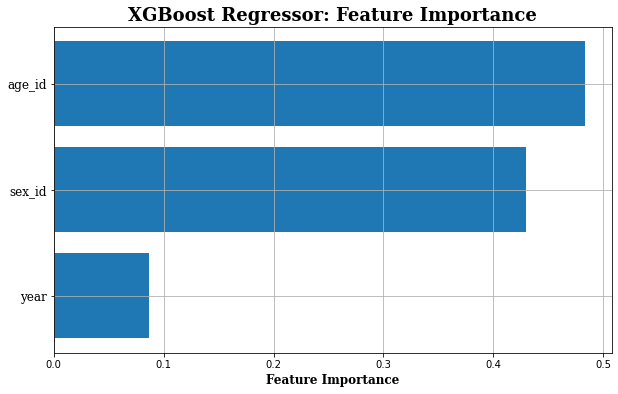

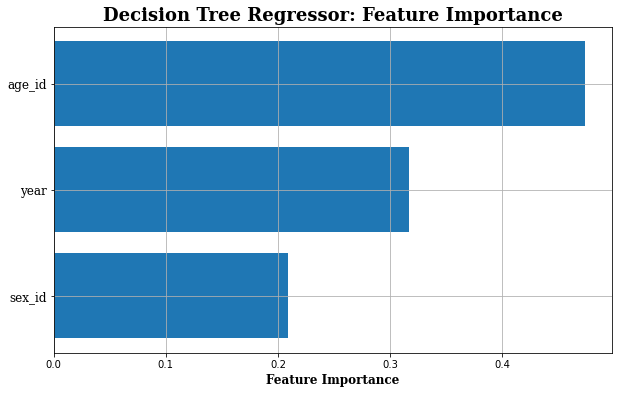

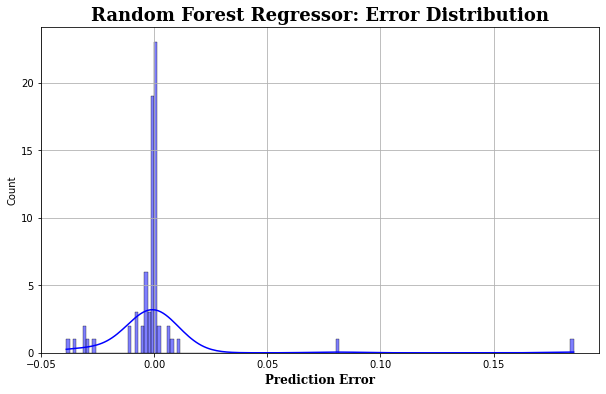

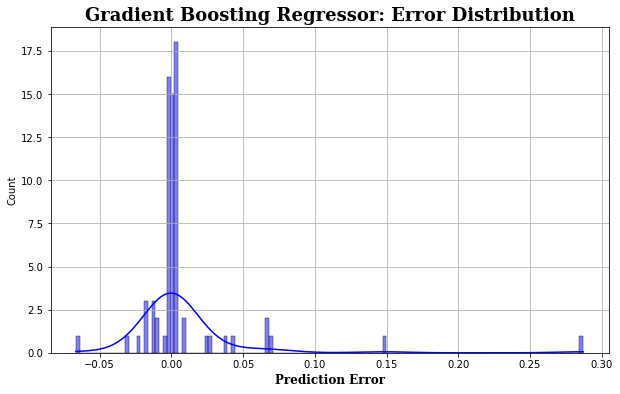

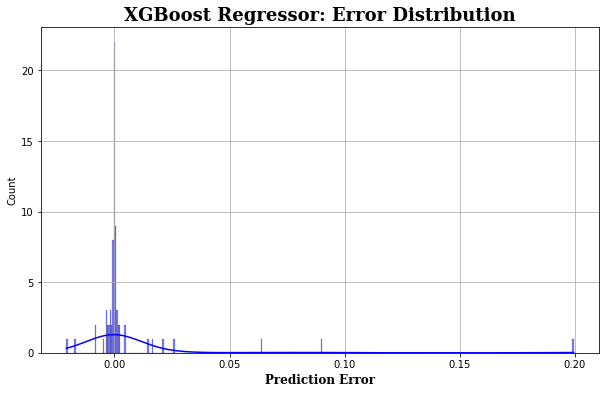

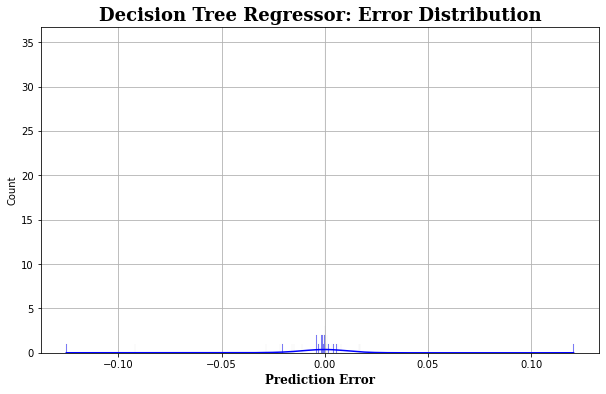

TypeError: __init__() got an unexpected keyword argument 'fontfamily'

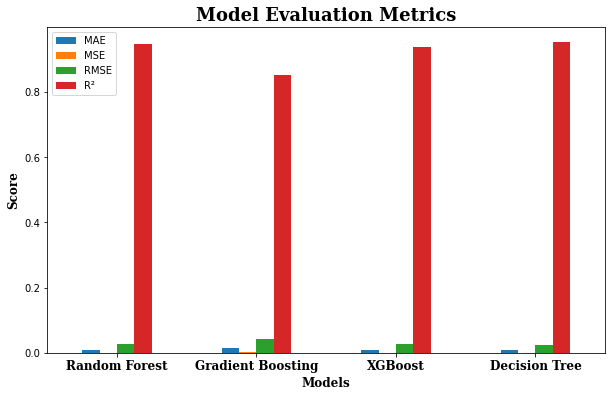

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming data is already loaded and models have been fitted, and predictions made

# Function to plot actual vs predicted scatter plot
def plot_scatter(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.title(title, fontsize=18, fontfamily='serif', fontweight='bold')
    plt.grid(True)
    plt.show()

# Function to plot residuals
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.ylabel('Residuals', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.title(title, fontsize=18, fontfamily='serif', fontweight='bold')
    plt.grid(True)
    plt.show()

# Function to plot feature importances
def plot_feature_importance(model, X_train, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=12, fontfamily='serif')
    plt.xlabel('Feature Importance', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.title(title, fontsize=18, fontfamily='serif', fontweight='bold')
    plt.grid(True)
    plt.show()

# Function to plot error distribution
def plot_error_distribution(y_test, y_pred, title):
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, color='blue')
    plt.xlabel('Prediction Error', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.title(title, fontsize=18, fontfamily='serif', fontweight='bold')
    plt.grid(True)
    plt.show()

# Function to plot evaluation metrics
def plot_evaluation_metrics(metrics, model_names):
    metrics_df = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'RMSE', 'R²'], index=model_names)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Evaluation Metrics', fontsize=18, fontfamily='serif', fontweight='bold')
    plt.ylabel('Score', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xlabel('Models', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.xticks(rotation=0, fontsize=12, fontfamily='serif', fontweight='bold')
    plt.legend(loc='best', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.grid(True)
    plt.show()

# Assuming predictions have already been made
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]

# Plotting scatter plots
for model_name, y_pred in zip(model_names, y_preds):
    plot_scatter(y_test, y_pred, f'{model_name} Regressor: Actual vs Predicted Values')

# Plotting residual plots
for model_name, y_pred in zip(model_names, y_preds):
    plot_residuals(y_test, y_pred, f'{model_name} Regressor: Residuals Plot')

# Plotting feature importance for tree-based models
plot_feature_importance(model_rfr, X_train, 'Random Forest Regressor: Feature Importance')
plot_feature_importance(model_gbr, X_train, 'Gradient Boosting Regressor: Feature Importance')
plot_feature_importance(model_xgbr, X_train, 'XGBoost Regressor: Feature Importance')
plot_feature_importance(model_dtr, X_train, 'Decision Tree Regressor: Feature Importance')

# Plotting error distribution
for model_name, y_pred in zip(model_names, y_preds):
    plot_error_distribution(y_test, y_pred, f'{model_name} Regressor: Error Distribution')

# Collecting evaluation metrics
metrics = []
for y_pred in y_preds:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append([mae, mse, rmse, r2])

# Plotting evaluation metrics
plot_evaluation_metrics(metrics, model_names)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


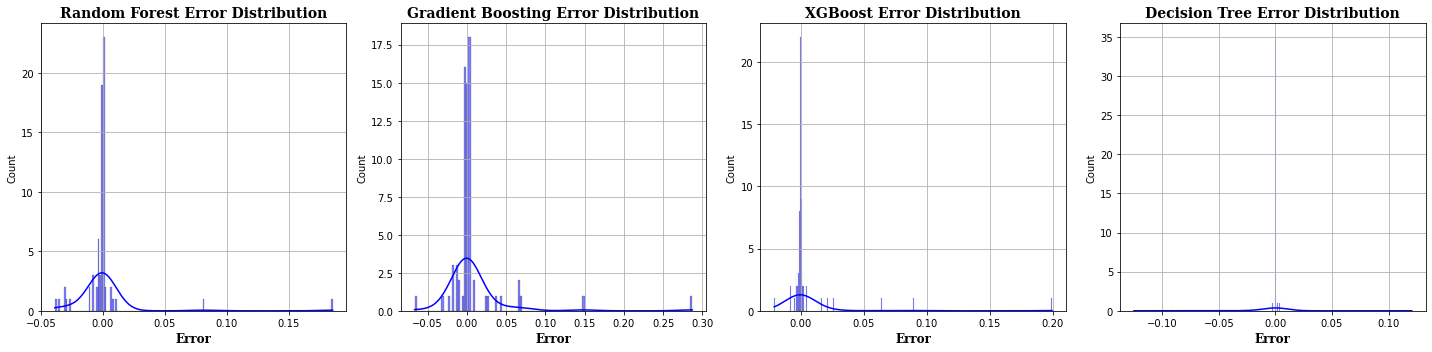

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined error distribution
def plot_combined_error_distribution(y_test, y_preds, model_names):
    plt.figure(figsize=(20, 5))

    for i, (y_pred, model_name) in enumerate(zip(y_preds, model_names)):
        errors = y_test - y_pred
        plt.subplot(1, 4, i + 1)
        sns.histplot(errors, kde=True, color='blue')
        plt.xlabel('Error', fontsize=12, fontfamily='serif', fontweight='bold')
        plt.title(f'{model_name} Error Distribution', fontsize=14, fontfamily='serif', fontweight='bold')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming predictions have already been made
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]

# Plotting combined error distribution
plot_combined_error_distribution(y_test, y_preds, model_names)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


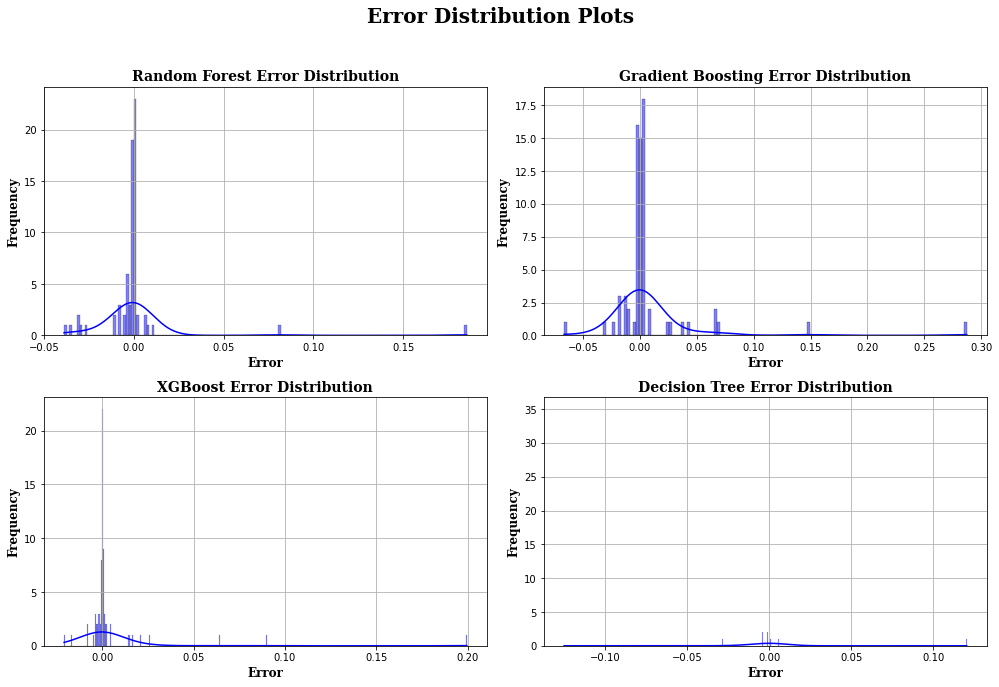

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot combined error distribution
def plot_combined_error_distribution(y_test, y_preds, model_names):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Error Distribution Plots', fontsize=20, fontfamily='serif', fontweight='bold')

    for i, (y_pred, model_name) in enumerate(zip(y_preds, model_names)):
        errors = y_test - y_pred
        ax = axes[i // 2, i % 2]
        sns.histplot(errors, kde=True, color='blue', ax=ax)
        ax.set_xlabel('Error', fontsize=12, fontfamily='serif', fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=12, fontfamily='serif', fontweight='bold')
        ax.set_title(f'{model_name} Error Distribution', fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Assuming predictions have already been made
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]

# Plotting combined error distribution
plot_combined_error_distribution(y_test, y_preds, model_names)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


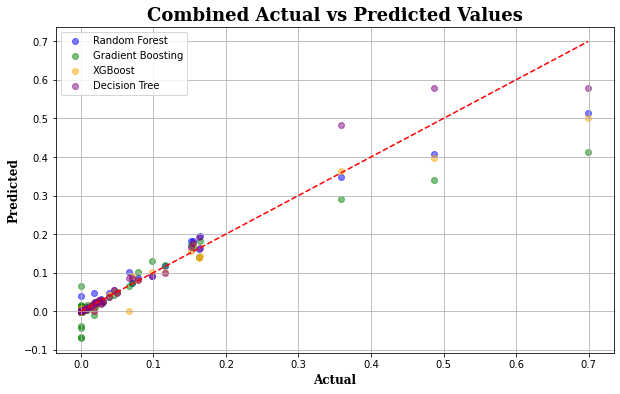

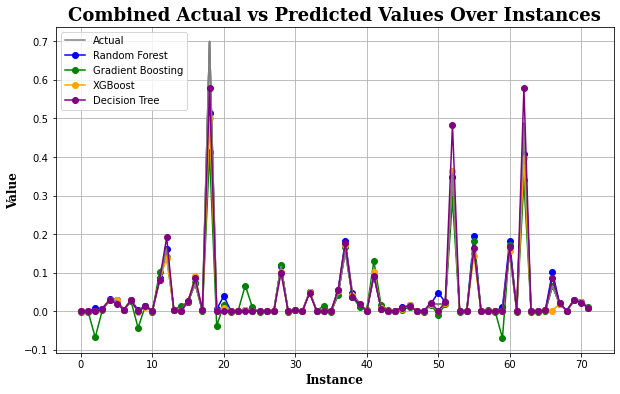

In [40]:
import matplotlib.pyplot as plt

# Assuming predictions have already been made
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]
colors = ['blue', 'green', 'orange', 'purple']

# Combined Scatter Plot
plt.figure(figsize=(10, 6))
for y_pred, model_name, color in zip(y_preds, model_names, colors):
    plt.scatter(y_test, y_pred, color=color, alpha=0.5, label=model_name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Combined Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Combined Line Plot
plt.figure(figsize=(10, 6))
instances = np.arange(len(y_test))
for y_pred, model_name, color in zip(y_preds, model_names, colors):
    plt.plot(instances, y_test, marker='', linestyle='-', color='grey', label='Actual' if model_name == model_names[0] else "")
    plt.plot(instances, y_pred, marker='o', linestyle='-', color=color, label=model_name)

plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Combined Actual vs Predicted Values Over Instances', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


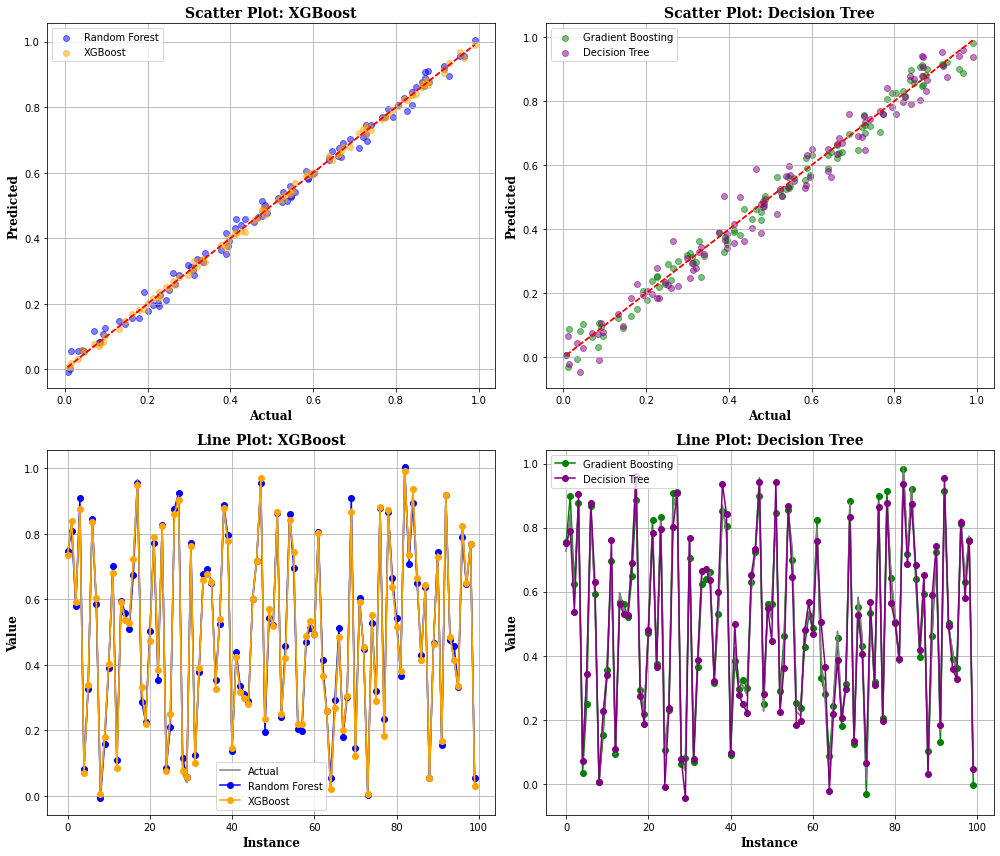

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming predictions have already been made
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]
colors = ['blue', 'green', 'orange', 'purple']

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Top row: Scatter plots
for i, (y_pred, model_name, color) in enumerate(zip(y_preds, model_names, colors)):
    ax = axs[0, i % 2]
    ax.scatter(y_test, y_pred, color=color, alpha=0.5, label=model_name)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_title(f'Scatter Plot: {model_name}', fontsize=14, fontfamily='serif', fontweight='bold')
    ax.legend()
    ax.grid(True)

# Bottom row: Line plots
instances = np.arange(len(y_test))
for i, (y_pred, model_name, color) in enumerate(zip(y_preds, model_names, colors)):
    ax = axs[1, i % 2]
    ax.plot(instances, y_test, marker='', linestyle='-', color='grey', label='Actual' if i == 0 else "")
    ax.plot(instances, y_pred, marker='o', linestyle='-', color=color, label=model_name)
    ax.set_xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_title(f'Line Plot: {model_name}', fontsize=14, fontfamily='serif', fontweight='bold')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


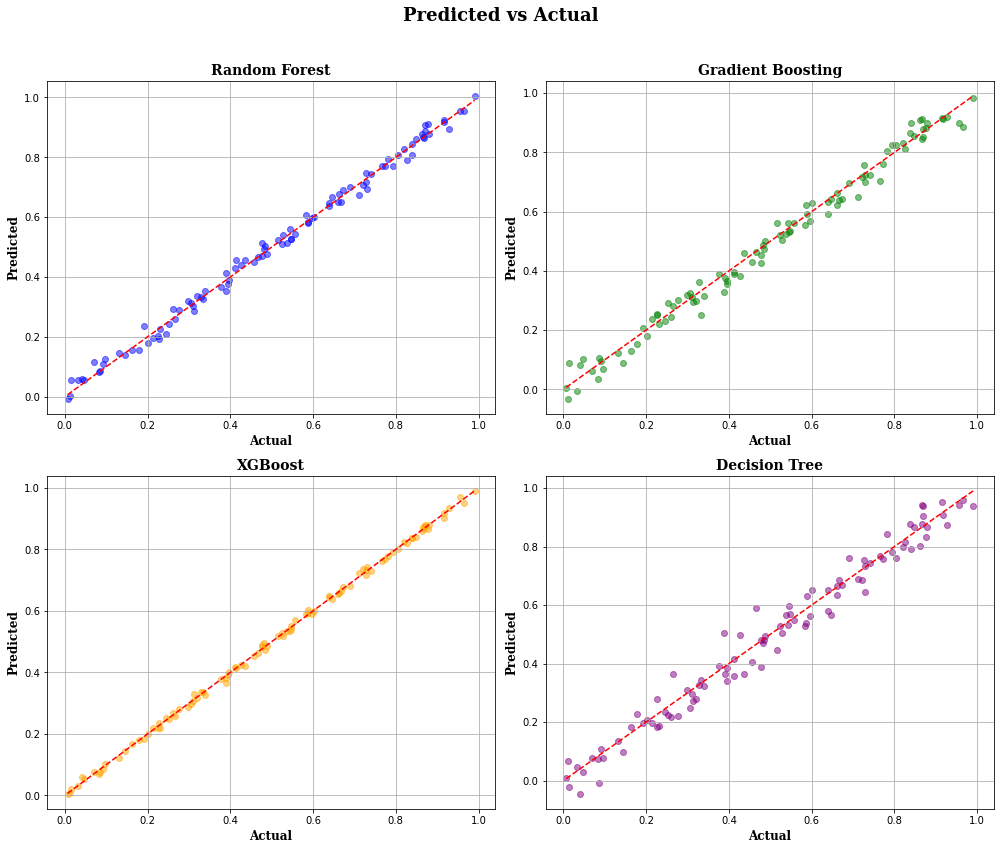

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (Assuming y_test and y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr are defined)
# Replace these with your actual predictions
y_test = np.random.rand(100)
y_pred_rfr = y_test + np.random.normal(0, 0.02, 100)
y_pred_gbr = y_test + np.random.normal(0, 0.03, 100)
y_pred_xgbr = y_test + np.random.normal(0, 0.01, 100)
y_pred_dtr = y_test + np.random.normal(0, 0.04, 100)

# Plot setup
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']
y_preds = [y_pred_rfr, y_pred_gbr, y_pred_xgbr, y_pred_dtr]
colors = ['blue', 'green', 'orange', 'purple']

# Create 2x2 grid for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot each scatter plot
for i, (ax, y_pred, model_name, color) in enumerate(zip(axs.ravel(), y_preds, model_names, colors)):
    ax.scatter(y_test, y_pred, color=color, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    ax.set_xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
    ax.set_title(model_name, fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(True)

# Overall title
fig.suptitle('Predicted vs Actual', fontsize=18, fontfamily='serif', fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


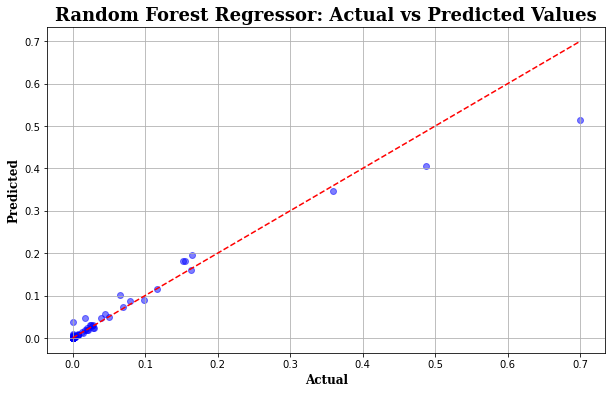

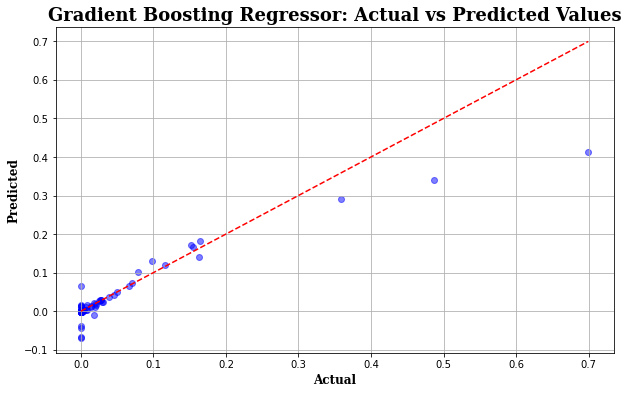

NameError: name 'y_pred_xgbr' is not defined

<Figure size 720x432 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the predictions from each model stored in the following variables:
# y_pred_rfr for Random Forest Regressor
# y_pred_gbr for Gradient Boosting Regressor
# y_pred_xgbr for XGBoost Regressor
# y_pred_dtr for Decision Tree Regressor

# Scatter Plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Random Forest Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for XGBoost Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgbr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Scatter Plot for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

In [59]:
# Random Forest Regressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

# Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

# XGBoost Regressor
model_xgbr = xgb(random_state=42)
model_xgbr.fit(X_train, y_train)
y_pred_xgbr = model_xgbr.predict(X_test)

# Decision Tree Regressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'module' object is not callable

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot for Random Forest Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Random Forest Regressor: Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Repeat similar plots for Gradient Boosting, XGBoost, and Decision Tree Regressors


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'y_pred_rfr' is not defined

<Figure size 720x432 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for better plotting
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df_melted, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Model Evaluation Metrics Comparison', fontsize=18, fontfamily='serif', fontweight='bold')
plt.xlabel('Model', fontsize=14, fontfamily='serif', fontweight='bold')
plt.ylabel('Metric Value', fontsize=14, fontfamily='serif', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'metrics_df' is not defined

In [45]:
def plot_line_comparison(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
    plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
    plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
    plt.title(f'{model_name} - Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for each model
plot_line_comparison(y_test_rf, y_pred_rf, 'Random Forest Regressor')
plot_line_comparison(y_test_gb, y_pred_gb, 'Gradient Boosting Regressor')
plot_line_comparison(y_test_xgb, y_pred_xgb, 'XGBoosting Regressor')
plot_line_comparison(y_test_dt, y_pred_dt, 'Decision Tree Regressor')


NameError: name 'y_test_rf' is not defined

In [ ]:
##################################################### LET US END HERE ##########################

In [53]:
############################# LINEAR REGRESSION REGRESSOR ###############################################################################

In [54]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Train the model - Linear Regression
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Make predictions
y_pred = model.predict(X_test)

C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

Root Mean Squared Error (RMSE): 0.09898692600243696
Mean Absolute Error (MAE): 0.06280297889555782
R-squared (R²): 0.19381638857958783


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


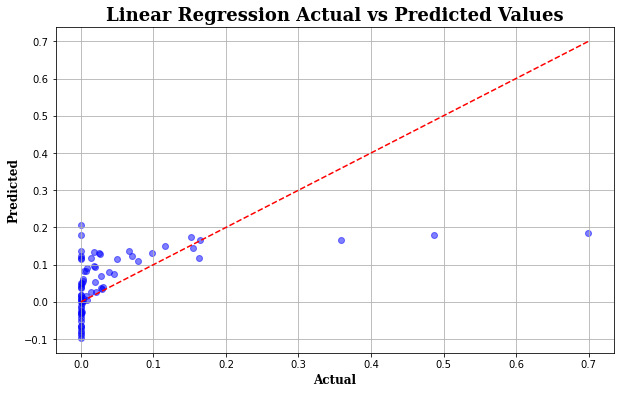

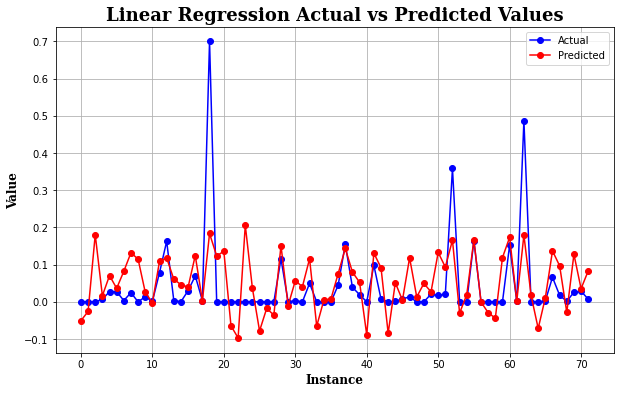

In [59]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Linear Regression Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Linear Regression Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

GradientBoostingRegressor(random_state=42)

In [68]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

Root Mean Squared Error (RMSE): 0.04261137150039745
Mean Absolute Error (MAE): 0.01558309860728989
R-squared (R²): 0.8506073209437991


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


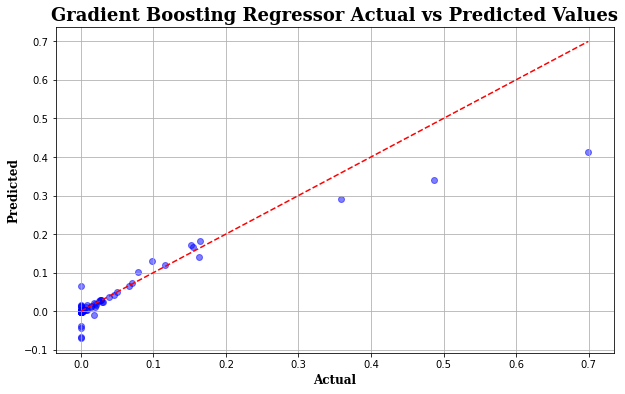

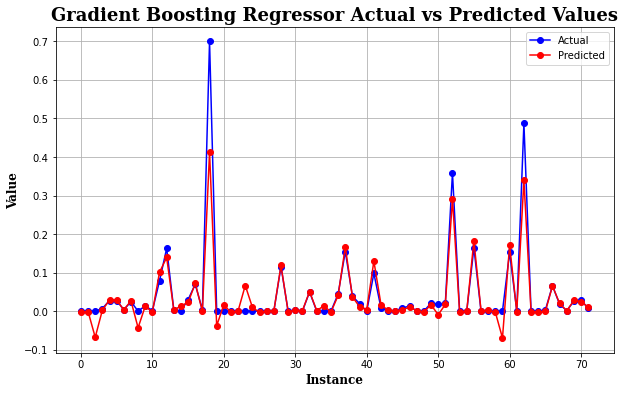

In [70]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Gradient Boosting Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

In [72]:
############################# SVM REGRESSOR ################################################################

In [73]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# Train the model - Support Vector Regressor
model = SVR()  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

Root Mean Squared Error (RMSE): 0.12431890059534455
Mean Absolute Error (MAE): 0.0990614259642599
R-squared (R²): -0.2716061266653831


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


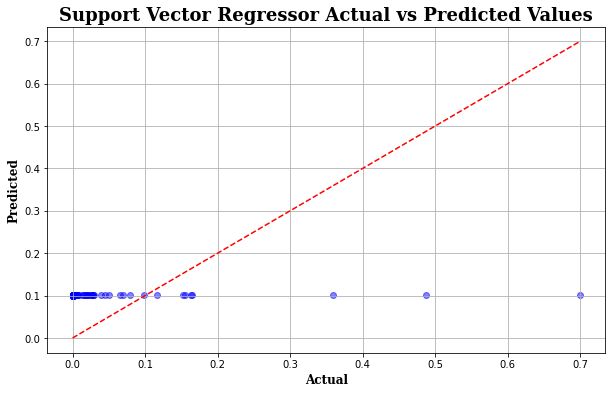

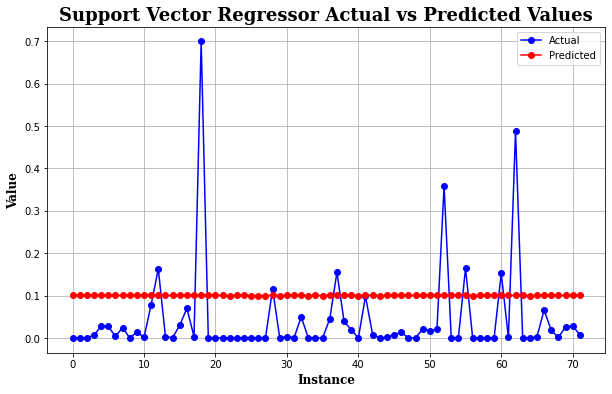

In [75]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Support Vector Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Support Vector Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

In [78]:
############################# KNN REGRESSOR ################################################################

C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean Squared Error (RMSE): 0.07729403251465021
Mean Absolute Error (MAE): 0.02798942839636314
R-squared (R²): 0.5084471470473821


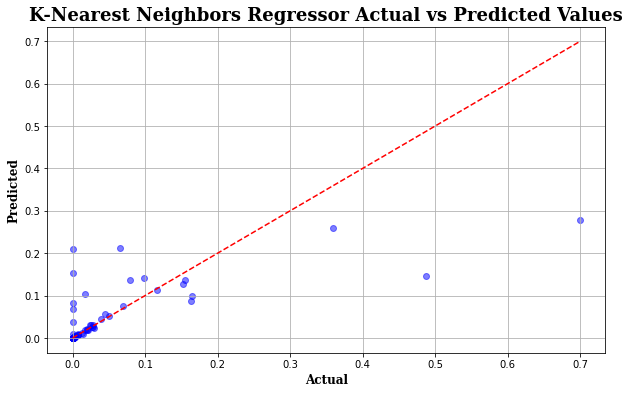

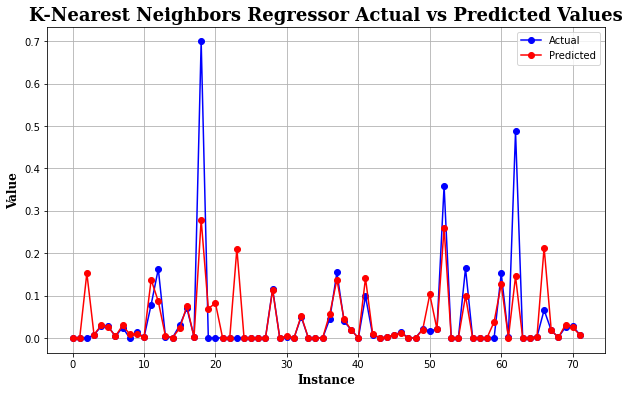

In [80]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - K-Nearest Neighbors Regressor
model = KNeighborsRegressor()  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('K-Nearest Neighbors Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('K-Nearest Neighbors Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')


C:\Users\2023\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Root Mean Squared Error (RMSE): 0.027544638475563234
Mean Absolute Error (MAE): 0.007652289918902266
R-squared (R²): 0.9375758779134534


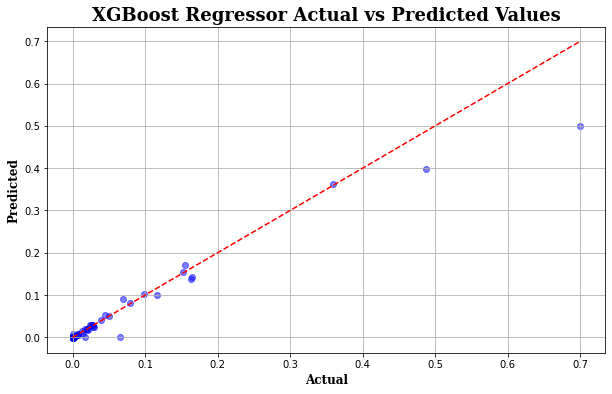

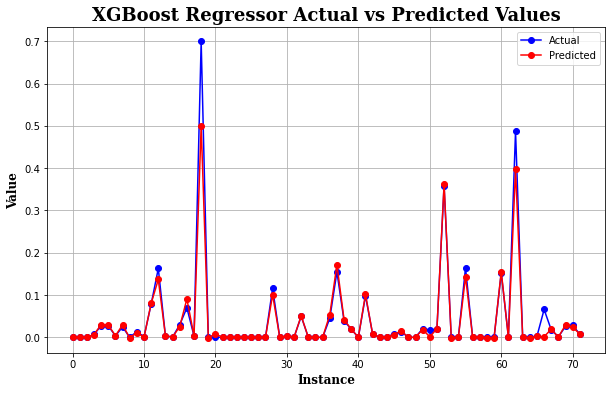

In [85]:
import warnings
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Train the model - XGBoost Regressor
model = XGBRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('XGBoost Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')


In [39]:
############################# DECISION TREES REGRESSOR ################################################################

Mean Squared Error (MSE): 0.0005796037901114599
Root Mean Squared Error (RMSE): 0.024074961892211998
Mean Absolute Error (MAE): 0.007519625288448186
R-squared (R²): 0.9523119563023763


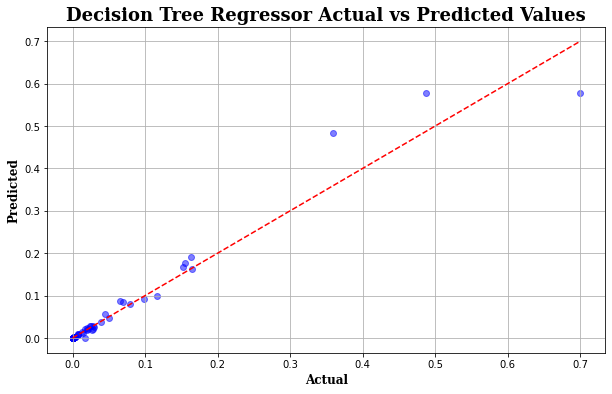

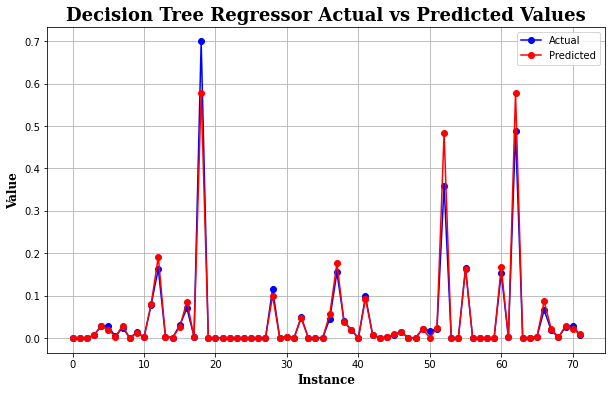

In [40]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Prepare data with additional features
X = data[['age_id', 'sex_id', 'year']]  # Including the year as an additional feature
y = data['val']  # Assuming 'val' is your target variable (continuous)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model - Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test.values, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')

Root Mean Squared Error (RMSE): 0.024074961892211998
Mean Absolute Error (MAE): 0.007519625288448186
R-squared (R²): 0.9523119563023763


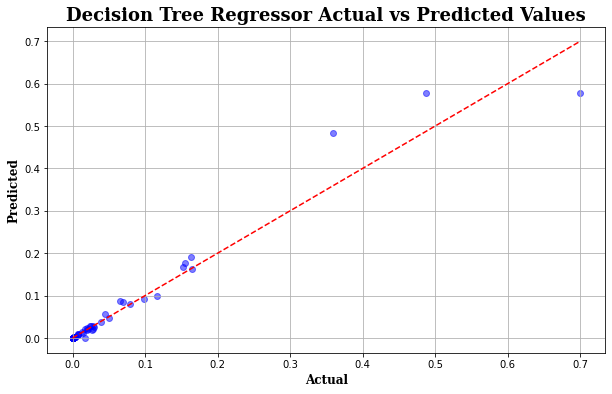

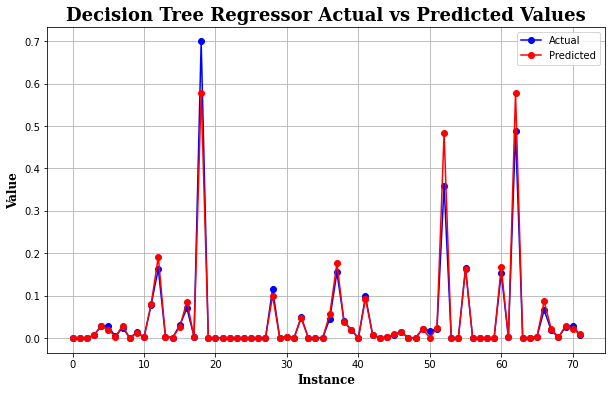

In [88]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Train the model - Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)  # Initialize the regressor
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R²):', r2)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Predicted', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.grid(True)
plt.show()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, marker='o', linestyle='-', color='red', label='Predicted')
plt.xlabel('Instance', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel('Value', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Decision Tree Regressor Actual vs Predicted Values', fontsize=18, fontfamily='serif', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

# Restore default warnings behavior
warnings.filterwarnings('default')
